In [1]:
import pandas as pd
import numpy as np
import ast

#To Ignore Warnings in Output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in the data
business = pd.read_csv('../data/output_csv/business_PA_Philly_clean.csv')
review = pd.read_csv('../data/output_csv/review_PA_Philly_clean.csv')

In [3]:
business.head()

,business_id,name,address,city,postal_code,latitude,longitude,stars,review_count,categories,...,Seafood Markets,Wraps,Shaved Ice,Cupcakes,Greek,Flowers & Gifts,Home & Garden,French,Candy Stores,Chocolatiers & Shops
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,19107,39.955505,-75.155564,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,19106,39.953949,-75.143226,4.0,245,"Sushi Bars, Restaurants, Japanese",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,19147,39.943223,-75.162568,4.5,205,"Korean, Restaurants",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,19123,39.962582,-75.135657,3.5,65,"Eatertainment, Arts & Entertainment, Brewpubs,...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,19104,39.954573,-75.194894,3.0,56,"Restaurants, Automotive, Delis, Gas Stations, ...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
review = review.drop(columns = ['review_id','year'])
review.head()

,user_id,business_id,stars
0,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5
1,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5
2,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5
3,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5
4,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4


In [5]:
business = business[['business_id','name']]

# Using all the surprise libraries

In [6]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [7]:
min_rest_ratings = 30
filter_rests = review['business_id'].value_counts() > min_rest_ratings
filter_rests = filter_rests[filter_rests].index.tolist()

min_user_ratings = 30
filter_users = review['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = review[(review['business_id'].isin(filter_rests)) & (review['user_id'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(review.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(547794, 3)
The new data frame shape:	(114883, 3)


In [8]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df_new, reader)

In [9]:

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(),SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.914681,0.156729,0.235718
SVDpp,0.918699,6.586634,2.745087
SVD,0.920133,1.235699,0.341841
KNNBaseline,0.924913,0.535562,5.483374
KNNWithMeans,0.932228,0.439160,4.370277
SlopeOne,0.938323,0.348646,1.689310
KNNWithZScore,0.938360,0.529634,5.065193
CoClustering,0.950432,2.103683,0.240453
KNNBasic,0.960189,0.418974,4.196282


In [10]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')


In [11]:
surprise_results


,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.914681,0.156729,0.235718
SVDpp,0.918699,6.586634,2.745087
SVD,0.920133,1.235699,0.341841
KNNBaseline,0.924913,0.535562,5.483374
KNNWithMeans,0.932228,0.439160,4.370277
SlopeOne,0.938323,0.348646,1.689310
KNNWithZScore,0.938360,0.529634,5.065193
CoClustering,0.950432,2.103683,0.240453
KNNBasic,0.960189,0.418974,4.196282


In [12]:
#Base Line Only has the best test rmse
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.90430048, 0.91336318, 0.91356671, 0.90373095, 0.91203555]),
 'fit_time': (0.10917162895202637,
  0.12557697296142578,
  0.13156962394714355,
  0.1146245002746582,
  0.13088035583496094),
 'test_time': (0.18337202072143555,
  0.12321734428405762,
  0.08468484878540039,
  0.13253355026245117,
  0.14648962020874023)}

In [13]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.9103


0.9102776149873176

In [14]:
trainset = algo.trainset
print(algo.__class__.__name__)

BaselineOnly


In [15]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)


In [16]:
UID = 'aFa96pz67TwOFu4Weq5Agg'

In [17]:
from collections import defaultdict

def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
    return top_n

In [18]:
all_pred = get_all_predictions(predictions)


In [19]:
all_pred

defaultdict(list,
            {'xjQSpme1Z7Xw8XehRLpYuA': [('TE2IEDNV0RcI6s1wTOP4fg',
               4.6086528594960905),
              ('_PQzeo8P2sGczzFEifrK-Q', 4.506210163906909),
              ('Qw7tz-UkPrpXaVidWuab4Q', 4.426812966454568),
              ('i_FWONQD1ZBqrNE2b-M5Ug', 4.209630701991557),
              ('trwHwsXOVV-ZmF-MtP98BA', 4.036358847908871),
              ('iUZEGx29miZObLd6_lt7Vg', 3.828686528176357),
              ('EtKSTHV5Qx_Q7Aur9o4kQQ', 3.8096246230056052),
              ('mXQ5qcjeVZKBbyWrdQ2Z0A', 3.7805164468915717),
              ('mzTTdvQGkUHZ8ii7OnZC5w', 3.7444190527306525),
              ('Iw8uqNPxviwcgxtruAx_LA', 3.6815020363468194),
              ('GoYSJ-YY-YwbxdgasHuq-Q', 3.6070283762834214),
              ('SCjUeZfjafJ88fWWQjRh2w', 3.5439752948536922),
              ('ZKPrXH_GNW_AtZ31tP3NmA', 3.516650483247407),
              ('ADe114o7Z4vb1O6HkM6YEA', 3.327337700363791),
              ('ev8KX9xeLe9fP9y-vV81tQ', 2.8454674118564034)],
             'yxr

In [20]:
n=11
for uid, user_ratings in all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    all_pred[uid] = user_ratings[:n]

In [21]:
tmp = pd.DataFrame.from_dict(all_pred, orient='index')
tmp_transpose = tmp.transpose()    

In [22]:
tmp_transpose

,xjQSpme1Z7Xw8XehRLpYuA,yxrDIW0b823PhQTZ0Q1KcA,pK2w9UgmSe-cSqIScplZKg,dt7hSz_Uh8-PdIlvefVwbQ,g54vHWBC9WftTq1LBKKiEg,vmUqcqMjlWoBM6qfmUXgyQ,3ZtKlGT9UNCv0tqVsiimkg,jXdkqjvAo_4ftyoU-IvMUg,rOnsnJGYDvv36WF20qu0AQ,lRvVaSIPosTTbOYFC3HPAg,...,rc0d5GifHEiOP-GRh7E-8w,66WeYHwruzUtHqTNCioSZg,wojMqIU5hJAv71o9h2mCig,FNM3cyBEiHcC8fNhZBVbpQ,m-Pnm53eK4NFW6keiL7yjQ,IlzXT_dFrwlAc1GWp5yJpg,J2i7ibyNFRhXyLiJwJtIyg,VJvOMCjU3_PJJR4-RhAkEg,-btcMnOND8URTv5Nwf-FjQ,hyv-a2bBQehwaTIeYlKecQ
0,"(TE2IEDNV0RcI6s1wTOP4fg, 4.6086528594960905)","(atZ_olNKXOG4rEr6mccN8g, 4.323551274964145)","(l8VedGQFMLtTz2zRmpTlxA, 4.887831308670302)","(atZ_olNKXOG4rEr6mccN8g, 4.2580197400647135)","(0X5TTmfBPPY98Ra2CcSw0Q, 4.328843512647558)","(U7HYUH8SqZO6OQMNKCr5kQ, 5)","(tBQcVd9c0EHKAXLZn_v54g, 4.179036231599054)","(DZglT5FP5VNDQJU3PuRIHw, 3.8026466589147643)","(eqNutOMnPqKa9QDAY6KfEw, 4.512423792495813)","(B5eJm8A4eiuPLW5C6l75dQ, 4.453211382331946)",...,"(Sv1MEZP-mMfp8SmE0hwYEA, 4.36088936513652)","(Iw8uqNPxviwcgxtruAx_LA, 3.888525973605451)","(C9UylQTOh7uwZo4a7QhLyg, 4.6473447197655355)","(OiQ1eoqXMPyEUptpUX9JQA, 3.6689571457028864)","(vhDWGF-8BfsxvS7Zo5Wv2w, 4.121940364095601)","(6_LnAQQ0-mml8YgpfRjGuA, 3.960628784157739)","(h7TO_IsmLCYmKKDVOOIeFw, 3.735846304856248)","(dChRGpit9fM_kZK5pafNyA, 4.564273853760295)","(oGMwCmV1EQZgCdylAbK9ow, 4.3169045949119615)","(kT8IlV47kz1rz2lTuNyO1w, 4.176134248214398)"
1,"(_PQzeo8P2sGczzFEifrK-Q, 4.506210163906909)","(cGX-1IUwXOjkUqZbkKYcjw, 3.8026620893649183)","(OAWa1WML2V1ZLJGD6V3nBQ, 4.8719737601304205)","(wbDRmtxaKRpBOjutvV6TEA, 4.05221241271976)","(BX3LLonrLLLfVX-tNrE7yA, 4.2637169152176995)","(jOaJ4PFGhGiM8fhuYcYFRg, 5)","(vhDWGF-8BfsxvS7Zo5Wv2w, 4.0722569777759245)","(s9ceDy-cVHe0uzvZpWq87Q, 3.7965724449214866)","(erz6oUEJdx787WyOlxMARw, 4.477768032971707)","(SHYPQbYqbfK4CwTDjtBH7Q, 4.036176001051895)",...,"(XFfuR-F1_wDbcf8xo2DVPw, 3.941153539588928)","(9PZxjhTIU7OgPIzuGi89Ew, 3.8141496398446924)","(mtvT7uRey3F395STFRM1Tg, 4.622555561121256)","(JHgfIjfB_C5LH3r7e8hV3g, 3.6068212441875214)","(-0TffRSXXIlBYVbb5AwfTg, 3.781913915446529)","(EzjysPg2-lVX1E0ibStUXw, 3.6683218840448197)","(IjMs1n7UelI7ev_5IDl5kA, 3.5249349539841073)","(y8gjlpJA89qDRCLC0JQaew, 4.31739686243182)","(7mpYTDb24SywNMRn3yeakQ, 4.10093046122348)","(pXRrRf8fDv6yU3xp1E25hA, 3.842527709176897)"
2,"(Qw7tz-UkPrpXaVidWuab4Q, 4.426812966454568)","(lKU_kljhbEQKIPaM1Zbqiw, 3.7413661660675275)","(cbr2Db20L6P50CsxsX6c2A, 4.766587232479928)","(0OsR9lO16jxa0xWUY57s9g, 3.8929903239373274)","(TbjqvdrSBm27arbKbReRfg, 4.236553785112826)","(G1q1IeNbiRJL5bReBLFdzQ, 4.905767072460862)","(VJjFHQJ08SR_Pl7Bk4o2xQ, 3.938016015659093)","(Gx6VfCz3OTtcQYfsMucMGA, 3.7964739936443888)","(-cEFKAznWmI0cledNOIQ7w, 4.451627435366063)","(-OIUunijjcq_ZzyyQhPPFQ, 4.025369392299231)",...,"(d28lZlSps97FHhXZazJ8zA, 3.528074673582954)","(mNXfzN6L3GPJdUJXbSsmfw, 3.6479117532431067)","(LM54ufrINJWoTN5imV8Etw, 4.499482918920947)","(LTSlKMxPKHmOCFluV-j17Q, 3.4457563721859072)","(bq0n3CQy1CkE_WUe76zQvg, 3.596199395077909)","(9PZxjhTIU7OgPIzuGi89Ew, 3.2628801154581177)","(XIKYdKWq72zUYsq8NBxcCQ, 3.301492353630653)","(2pLIQ0RHSmUbF0eIRT0LYg, 4.229250536945286)",None,"(GAuweBrcC_wK3a0UhZjwfA, 3.8159662025958734)"
3,"(i_FWONQD1ZBqrNE2b-M5Ug, 4.209630701991557)","(nIAbuktMEzVjT4P9pG89rQ, 3.7294145813717132)","(hyFzDuyOWNG2rg5GYJ2wiQ, 4.734731289969853)","(44Xh-IjWDSn7XTw1hzO50g, 3.8821095260551903)","(dYinIkKBspHV5hSaukklFg, 4.039633660574461)","(Mfyqn9bYNL7jVsXjXH_ymg, 4.899277877577678)","(-Om8XgP9GZ4UUFbgTRI4YQ, 3.9101128308782176)","(AGlh4ZDv6jnoiYfz7At9mw, 3.7365405381210204)","(uTUTULYSAmHGK7w5DDw5iA, 4.293010557762307)","(nIAbuktMEzVjT4P9pG89rQ, 3.957876757440384)",...,None,"(_PvljXZHQlUmL8SuOXF8ug, 3.3818621453622644)","(dChRGpit9fM_kZK5pafNyA, 4.305989276673987)",None,"(YzluF3FNGjnW-tOrLZt8JA, 3.5521179768510454)","(BxfvdHqETU8jWYUjx5OL2A, 3.197383782095046)","(XYwx1tsEB3_G0tgS6l-0PQ, 3.272826111517508)","(AAvoBxeUwDnD5ThE9Cz6Fg, 4.20542097856832)",None,"(gB9c_OMjvGrn36XjHArAUQ, 3.3875929283970896)"
4,"

In [23]:
tmp_transpose.loc[:,'IQsF3Rc6IgCzjVV9DE8KXg']

0      (kZ1q0K13tFYG_ZJrVvsJHA, 3.891790007163424)
1     (qQO7ErS_RAN4Vs1uX0L55Q, 3.8400938499517263)
2     (DZglT5FP5VNDQJU3PuRIHw, 3.7940243343677422)
3     (KkdLjGfVsfGESNkE0ktURg, 3.7596761977093918)
4     (73UjNbSoQjQAOS45rcihFg, 3.5551377719874764)
5      (Ldch7Nc5gaZrhcIRd7mcjw, 3.549698900959122)
6      (qmsdbXMG6DCNXEEZJz4d5g, 3.512957165800418)
7     (KHQXmUFiAD0FHvrMSakJBA, 3.3722021527509987)
8                                             None
9                                             None
10                                            None
Name: IQsF3Rc6IgCzjVV9DE8KXg, dtype: object

In [24]:
def get_predictions(user_id,n):
    
    all_pred = get_all_predictions(predictions)

    for uid, user_ratings in all_pred.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        all_pred[uid] = user_ratings[:n]
    tmp = pd.DataFrame.from_dict(all_pred, orient='index')
    tmp_transpose = tmp.transpose()    
    print("User ID:",user_id)
    results = tmp_transpose.loc[:,user_id]
    recommended_rest_ids=[]
    for x in range(0, n):
    #print(x)
        recommended_rest_ids.append(results[x][0])
        recommended_rest = business[business['business_id'].isin(recommended_rest_ids)]
    return recommended_rest[['business_id','name']]

In [25]:
UID = 'CMZDABnxD44sGlCPekFu3w'
n = 8
results = get_predictions(UID,n)
results

User ID: CMZDABnxD44sGlCPekFu3w


,business_id,name
154,J-ciDDEdIHMcChGIyKZnOg,Cake Life Bake Shop
459,AlxnbBd2JNkozNvI0OvRLQ,Murph's Bar
642,Sv1MEZP-mMfp8SmE0hwYEA,Terakawa Ramen
1000,y6FxggLj1xnJ0ArqV3UoVw,Andy's Chicken
1866,Qw7tz-UkPrpXaVidWuab4Q,Philadelphia Museum of Art
3211,BPBTCvmUfRnEH6yyABzOzA,Evil Genius Beer
3781,S1FwTmCAwv5ulu5gToWi_w,RIM Cafe
4275,qQO7ErS_RAN4Vs1uX0L55Q,The Franklin Fountain


In [26]:
def get_Iu(uid):
    """
    args: 
    uid: the id of the user
    returns:
    the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
def get_Ui(iid):
    """
    args:
    iid: the raw id of the item
    returns:
    the number of users that have rated the item.
    """
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    

In [27]:
df_predictions = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_predictions['Iu'] = df_predictions.uid.apply(get_Iu)
df_predictions['Ui'] = df_predictions.iid.apply(get_Ui)
df_predictions['err'] = abs(df_predictions.est - df_predictions.rui)

In [28]:
best_predictions = df_predictions.sort_values(by='err')[:10]
worst_predictions = df_predictions.sort_values(by='err')[-10:]


In [29]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
22648,Y0MjA5a67vfzttu7TENETQ,i_FWONQD1ZBqrNE2b-M5Ug,5.0,5.0,{'was_impossible': False},93,251,0.0
6415,0dxR_Q8PCOOWNkfpvI4t3w,LM54ufrINJWoTN5imV8Etw,5.0,5.0,{'was_impossible': False},54,166,0.0
28457,nUXwfzh2r3laqaEMwCPAgg,gi0spJVFEYqfDWv0cI1KgQ,5.0,5.0,{'was_impossible': False},21,16,0.0
25307,nUXwfzh2r3laqaEMwCPAgg,mtvT7uRey3F395STFRM1Tg,5.0,5.0,{'was_impossible': False},21,184,0.0
294,XrWAdRK4CUUK85Ak3x-HDw,ytynqOUb3hjKeJfRj5Tshw,5.0,5.0,{'was_impossible': False},56,413,0.0
3822,T4Uk_zyBFvIUsBVninUqRg,TKPAyOWcexkpVHPCdYTNmQ,5.0,5.0,{'was_impossible': False},52,30,0.0
27359,A4WMwbeMsE8NZ8DJfOMONg,V4Dr3ragKHKeUab96miyMA,5.0,5.0,{'was_impossible': False},43,36,0.0
15264,lxA2xhPoGyEKdfKkR7u7yw,_3NZVCWeyFZ1_vWqi2avjw,5.0,5.0,{'was_impossible': False},62,33,0.0
12163,ySdQOT6sGt13SNsFjECEPA,i_FWONQD1ZBqrNE2b-M5Ug,5.0,5.0,{'was_impossible': False},26,251,0.0
1035,lxA2xhPoGyEKdfKkR7u7yw,qiWuEwOfZDhad1kdyCDAIA,5.0,5.0,{'was_impossible': False},62,9,0.0


In [30]:
worst_predictions


,uid,iid,rui,est,details,Iu,Ui,err
7674,7x7SqqLaCASbpWeJZmQDUQ,IkY2ticzHEn4QFn8hQLSWg,5.0,1.493947,{'was_impossible': False},34,169,3.506053
24348,B4cnr5d2S_7McR3XBfrscA,-xov4QrIEkyNrSArhjmjZQ,1.0,4.524410,{'was_impossible': False},45,6,3.524410
26057,vFd8aBLg1kFcd0kCkoi-xw,3VA5BgRcVd-mAvSFJFFveQ,1.0,4.539225,{'was_impossible': False},376,7,3.539225
18603,rZ4rHwgqTnP4NUcpG_MQvw,5ezrDoezdUlJpUa5Jg6dUQ,1.0,4.544850,{'was_impossible': False},21,20,3.544850
22601,wpMvNi8YZsBDJXf0YYzxzQ,AnhgZCyjhzU8JVxl2ftJKQ,1.0,4.626015,{'was_impossible': False},100,67,3.626015
177,iWdmOyWAToTbmkm1ViAltg,49Gyz-LD9MxTh1yzbYiOhw,1.0,4.631591,{'was_impossible': False},28,68,3.631591
2038,vAIyDKkeXnBc6G1GIxlekg,jjFUWQdn6HANmgVy3Qy0RA,1.0,4.639139,{'was_impossible': False},27,4,3.639139
18235,DjWTA9NjPrK4y7tfMYSlnA,VwZ5NDbIu3elGQI6MzcXBA,1.0,4.738584,{'was_impossible': False},20,76,3.738584
3422,USD9k93iOIB88v93B5iBcw,tBQcVd9c0EHKAXLZn_v54g,1.0,4.761023,{'was_impossible': False},75,79,3.761023
6806,84lcVCz48xx5Jpfi4rB2Zg,mtvT7uRey3F395STFRM1Tg,1.0,4.847279,{'was_impossible': False},41,184,3.847279


In [31]:
df_new.loc[df_new['business_id'] == '3VA5BgRcVd-mAvSFJFFveQ']['stars'].describe()


count    9.000000
mean     4.111111
std      1.269296
min      1.000000
25%      4.000000
50%      4.000000
75%      5.000000
max      5.000000
Name: stars, dtype: float64

<IPython.core.display.Javascript object>


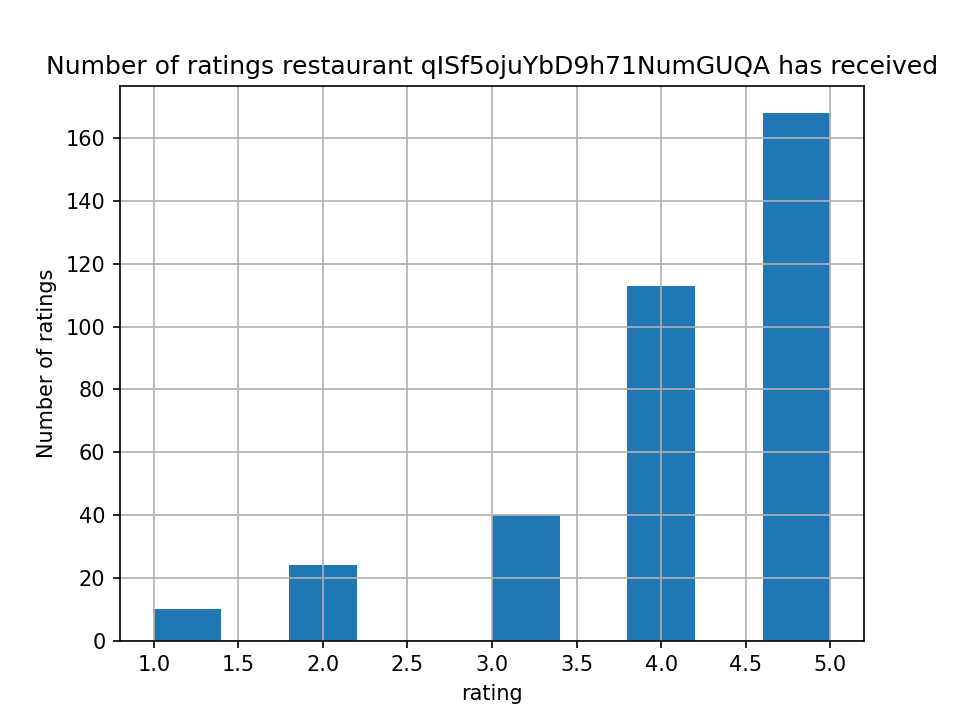

In [32]:
import matplotlib.pyplot as plt
%matplotlib notebook

df_new.loc[df_new['business_id'] == 'qISf5ojuYbD9h71NumGUQA']['stars'].hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings restaurant qISf5ojuYbD9h71NumGUQA has received')
plt.show();
